In [1]:
%matplotlib inline

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import copy

transform = transforms.Compose([
        #transforms.Resize(224, interpolation= 2),
        transforms.ToTensor(),
        #transforms.Normalize((0.5),(0.5))
    ])

batch_size = 40

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(dataset=trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=0)

testset=torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(dataset=testset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

dataloaders = {'train' : trainloader, 'val' : testloader }
dataset_sizes = { 'train' : len(trainset) , 'val' : len(testset) }

class_names = ('0', '1', '2', '3','4', '5', '6', '7', '8', '9')
print(class_names)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #GPU 사용가능 여부확인

('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')


In [6]:
#transform = transforms.Compose(
 #   [transforms.ToTensor(),
  #   transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#train_dataset = datasets.MNIST(root='./data', train=True,
 #                                       transform=transform.ToTensor(), download=True)
#trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=4,
#                                          shuffle=True)

#testset = torchvision.datasets.MNIST(dataset ='./data' , train=False,
 #                                      transform=transform.ToTensor)
#testloader = torch.utils.data.DataLoader(testset, batch_size=4,
 #                                        shuffle=False)

#classes = ('plane', 'car', 'bird', 'cat',
 #          'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
          

    4     7     1     7


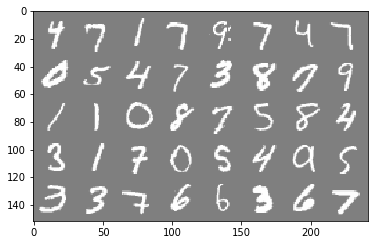

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join('%5s' % class_names[labels[j]] for j in range(4)))

In [46]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(256, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0) ,-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [47]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [48]:
for epoch in range(2):  # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 입력을 받은 후
        inputs, labels = data

        # 변화도(Gradient) 매개변수를 0으로 만든 후
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계 출력
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

Finished Training


GroundTruth:      7     2     1     0     4     1


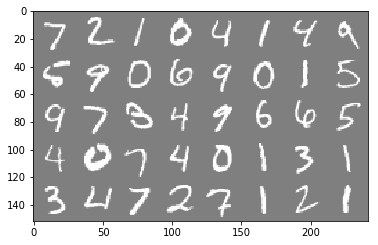

In [62]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % class_names[labels[j]] for j in range(6)))

In [58]:
outputs = net(images)

In [59]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % class_names[predicted[j]]
                              for j in range(4)))

Predicted:      7     2     1     0


In [60]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 94 %


In [61]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        class_names[i], 100 * class_correct[i] / class_total[i]))

Accuracy of     0 : 98 %
Accuracy of     1 : 98 %
Accuracy of     2 : 93 %
Accuracy of     3 : 96 %
Accuracy of     4 : 93 %
Accuracy of     5 : 89 %
Accuracy of     6 : 98 %
Accuracy of     7 : 95 %
Accuracy of     8 : 93 %
Accuracy of     9 : 92 %
